In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

selected_metrics_placenta = pd.read_csv("selected_metrics_placenta.csv", index_col=0)
selected_metrics_mouse = pd.read_csv("selected_metrics_mouse.csv", index_col=0)
selected_metrics_oligodendrocyte = pd.read_csv("selected_metrics_oligodendrocyte.csv", index_col=0)
selected_metrics_planaria = pd.read_csv("selected_metrics_planaria.csv", index_col=0)

In [23]:
# Calculate the average of the respective cells in the 4 dataframes
average_metrics = (selected_metrics_placenta + selected_metrics_mouse + 
                   selected_metrics_oligodendrocyte + selected_metrics_planaria) / 4

print(average_metrics)

                HIM  F1_branches  Correlation  Featureimp_wcor  Overall Score
Via        0.488510     0.230782     0.746016         0.770439       0.486736
Margaret   0.575217     0.341843     0.565154         0.909395       0.550085
Palantir   0.423914     0.339473     0.650780         0.865257       0.521949
PAGA       0.426125     0.127939     0.680886         0.673578       0.384492
DPT        0.516669     0.321103     0.469775         0.781676       0.445775
Slingshot  0.488667     0.394429     0.697599         0.878238       0.578561
Scorpius   0.343052     0.273801     0.745251         0.840322       0.488822


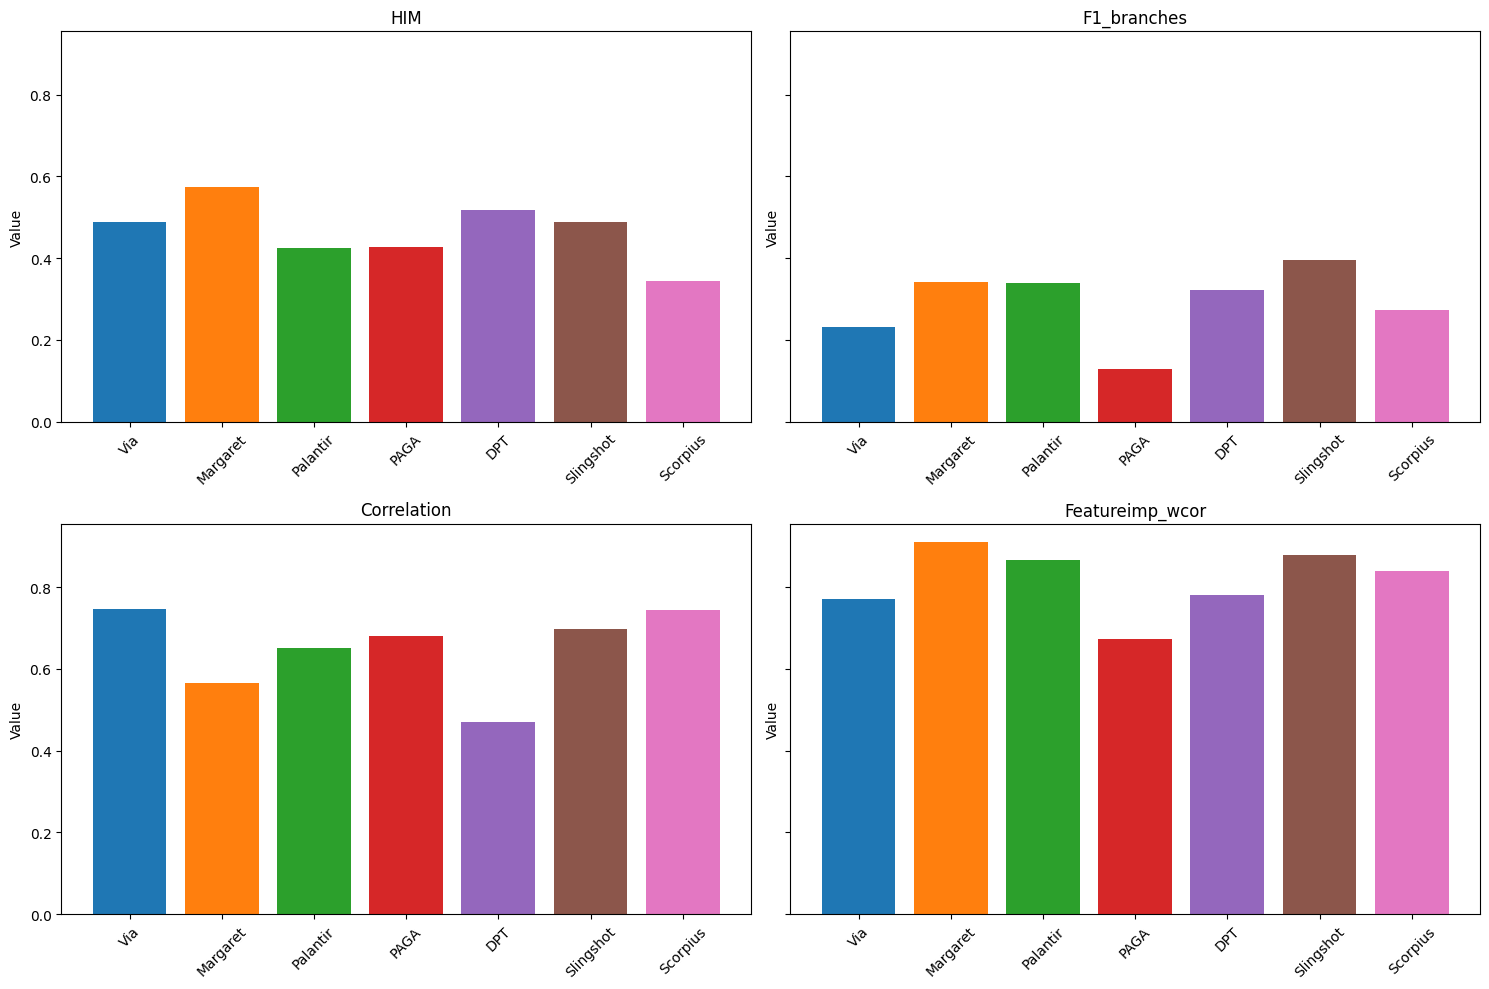

In [31]:


columns_to_plot = average_metrics.columns[:4]

# Adjust the layout to create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 2)
    axes[row, col].bar(average_metrics.index, average_metrics[column], color=plt.cm.tab10.colors[:7])
    axes[row, col].set_title(column)
    axes[row, col].set_xticks(range(len(average_metrics.index)))
    axes[row, col].set_xticklabels(average_metrics.index, rotation=45)
    axes[row, col].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [2]:
metrics = pd.DataFrame({
    'placenta': selected_metrics_placenta.mean(),
    'mouse': selected_metrics_mouse.mean(),
    'oligodendrocyte': selected_metrics_oligodendrocyte.mean(),
    'planaria': selected_metrics_planaria.mean()
})

print(metrics)

                 placenta     mouse  oligodendrocyte  planaria
HIM              0.481256  0.438405         0.411498  0.532929
F1_branches      0.353694  0.276330         0.179382  0.350234
Correlation      0.788918  0.758773         0.538541  0.516889
Featureimp_wcor  0.877689  0.753655         0.794968  0.841633
Overall Score    0.578518  0.498674         0.402852  0.495052


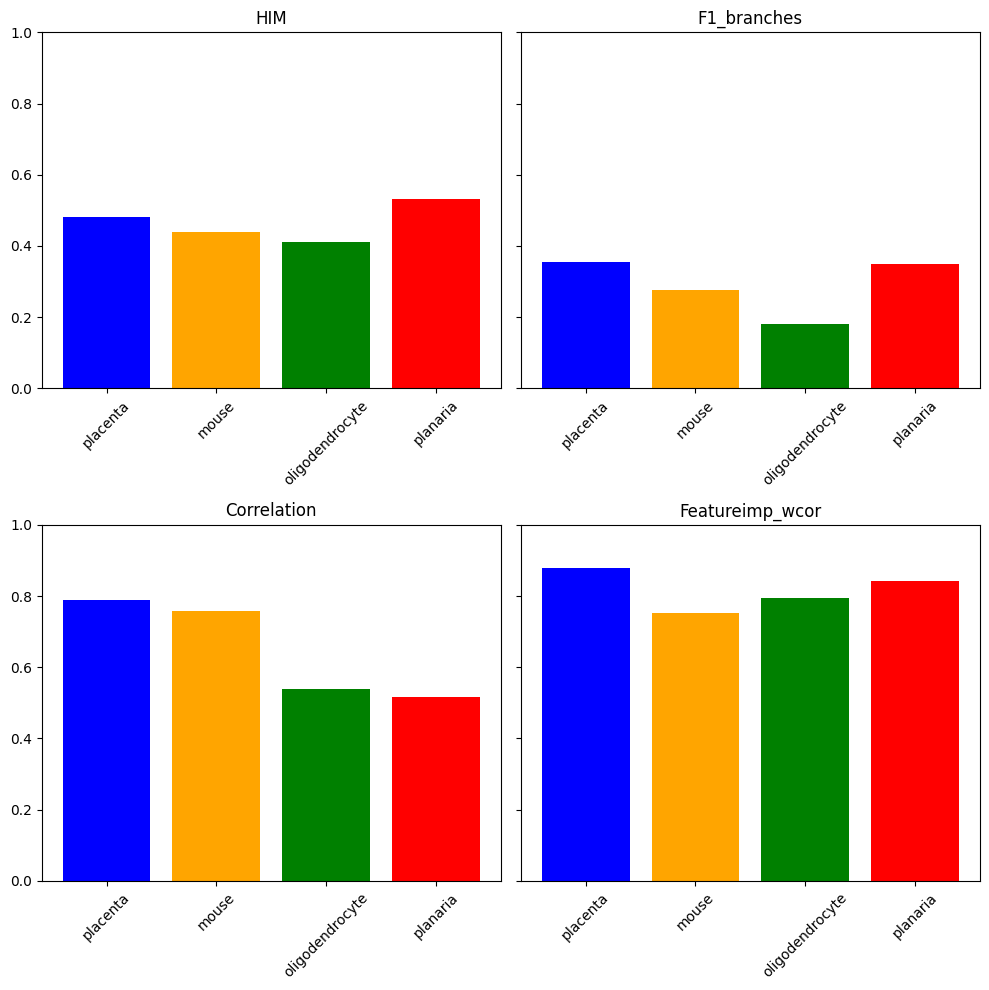

In [44]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

# Ensure axes is a 2D array for consistent indexing
axes = axes.flatten()

for i, (index, row) in enumerate(metrics.iterrows()):
    if i == 4:
        break
    axes[i].bar(metrics.columns[:4], row[:4], color=['blue', 'orange', 'green', 'red'])
    axes[i].set_title(index)
    axes[i].set_xticks(range(4))
    axes[i].set_xticklabels(metrics.columns[:4], rotation=45)
    axes[i].set_ylim(0, 1)
plt.tight_layout()
plt.show()

In [49]:
metrics

,placenta,mouse,oligodendrocyte,planaria,average,variance,std_dev
HIM,0.481256,0.438405,0.411498,0.532929,0.466022,0.001238,0.045946
F1_branches,0.353694,0.276330,0.179382,0.350234,0.289910,0.007628,0.070902
Correlation,0.788918,0.758773,0.538541,0.516889,0.650780,0.018683,0.123763
Featureimp_wcor,0.877689,0.753655,0.794968,0.841633,0.816986,0.003989,0.046872
Overall Score,0.578518,0.498674,0.402852,0.495052,0.493774,0.007736,0.062197


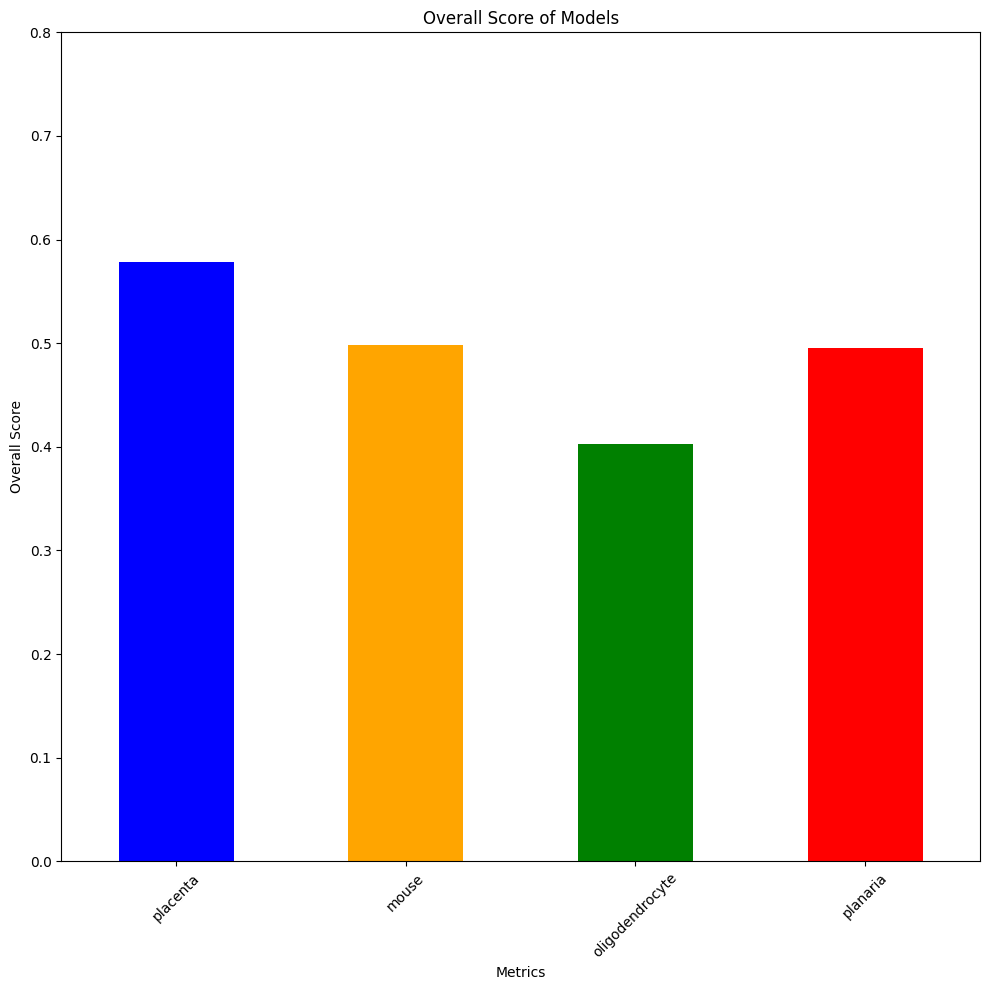

In [58]:
metrics.loc['Overall Score', metrics.columns[:4]].plot(kind='bar', figsize=(10, 10), color=['blue', 'orange', 'green', 'red'])
plt.title('Overall Score of Models')
plt.ylabel('Overall Score')
plt.xlabel('Metrics')
plt.ylim(0, 0.8)  # Corrected method
plt.xticks(range(4), metrics.columns[:4], rotation=45)
plt.tight_layout()
plt.show()

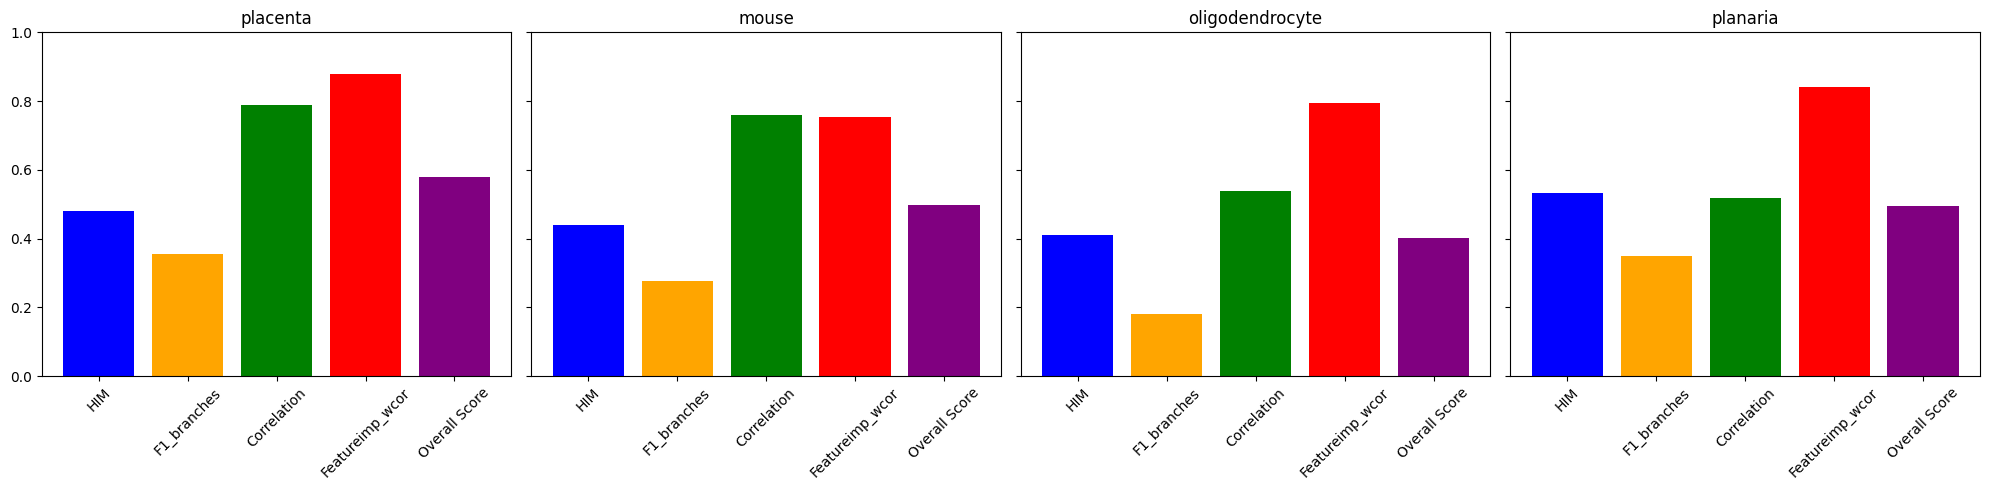

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, column in enumerate(metrics.columns):
    axes[i].bar(metrics.index, metrics[column], color=['blue', 'orange', 'green', 'red', 'purple'])
    axes[i].set_title(column)
    axes[i].set_xticks(range(len(metrics.index)))
    axes[i].set_xticklabels(metrics.index, rotation=45)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [5]:
# Calculate the average of the "Overall Score" column for each row across the 4 dataframes
models = pd.DataFrame({
    'Overall Score': (
        selected_metrics_placenta['Overall Score'] +
        selected_metrics_mouse['Overall Score'] +
        selected_metrics_oligodendrocyte['Overall Score'] +
        selected_metrics_planaria['Overall Score']
    ) / 4
})

print(models)

           Overall Score
Via             0.486736
Margaret        0.550085
Palantir        0.521949
PAGA            0.384492
DPT             0.445775
Slingshot       0.578561
Scorpius        0.488822


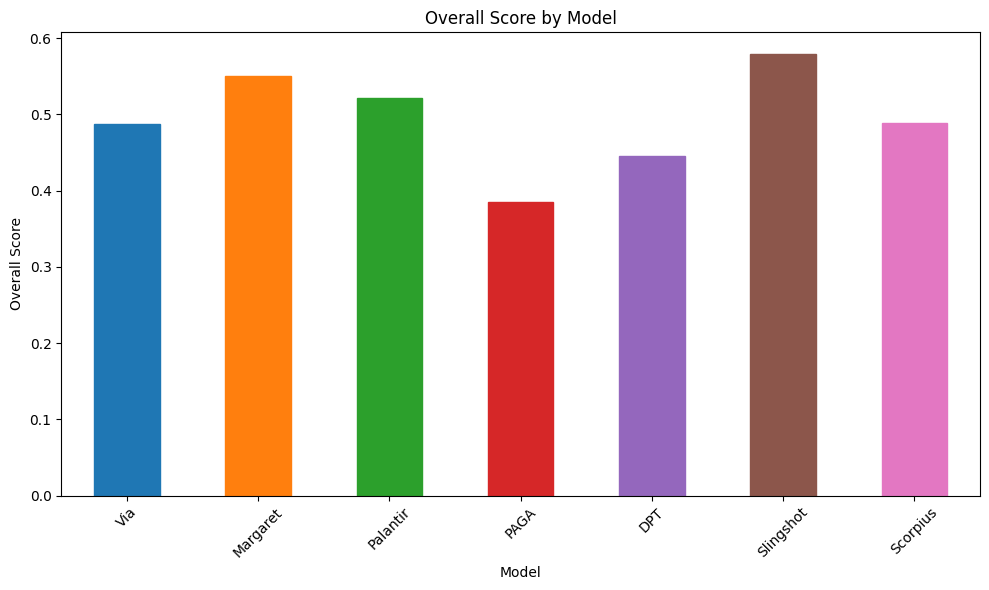

In [6]:
models.plot(kind='bar', legend=False, figsize=(10, 6), color='skyblue')
plt.title('Overall Score by Model')
plt.ylabel('Overall Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
colors = plt.cm.tab10(range(len(models)))
for bar, color in zip(plt.gca().patches, colors):
    bar.set_color(color)
plt.tight_layout()
plt.show()

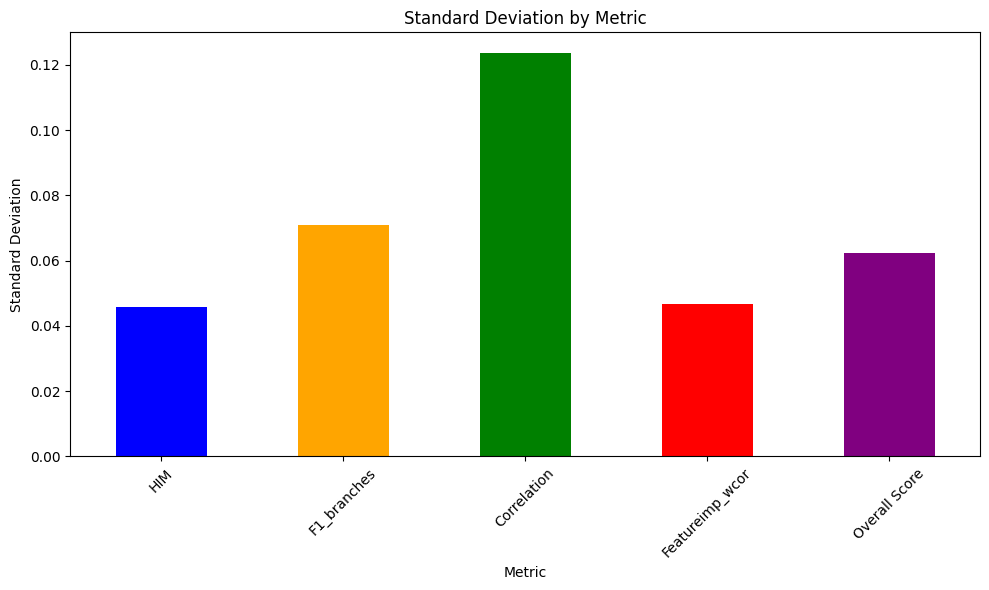

In [22]:

# Calculate standard deviation for each row and add it as a new column
metrics['std_dev'] = metrics.iloc[:, :-2].std(axis=1)

# Plot the standard deviation column
metrics['std_dev'].plot(kind='bar', figsize=(10, 6), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Standard Deviation by Metric')
plt.ylabel('Standard Deviation')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

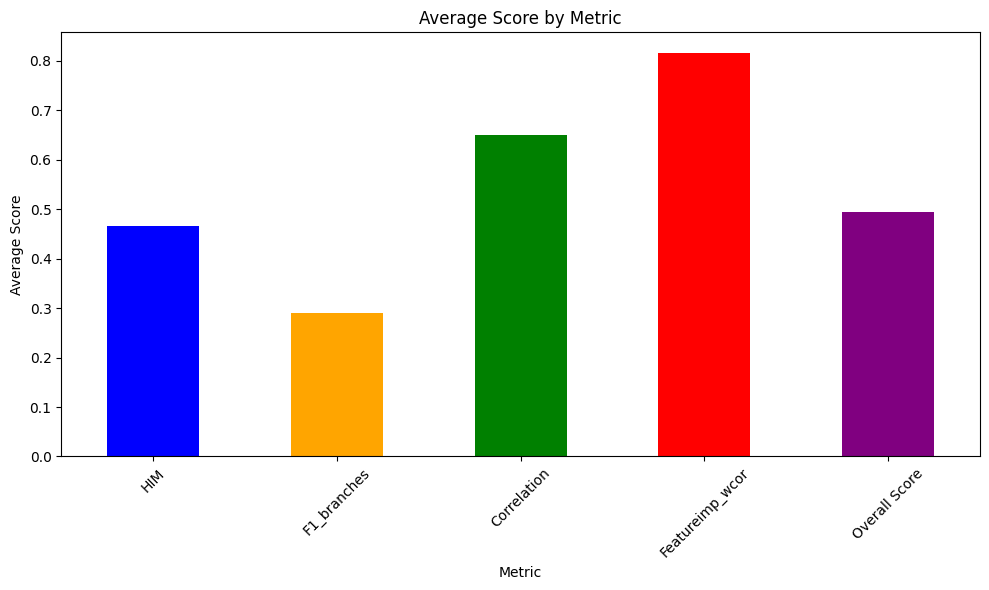

In [19]:
metrics['average'] = metrics.mean(axis=1)

metrics['average'].plot(kind='bar', figsize=(10, 6), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Average Score by Metric')
plt.ylabel('Average Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()